# 공공 인공지능 Open API 활용

### 공원이미지 _사람인식

In [1]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [2]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [3]:
import os
img_file = 'images/공원.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [4]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:] 
# jfif 파일은 jpg로 image_type을 설정하고, 아니면 .을 제외한 나머지가 image_type
image_type

'jpg'

In [8]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [11]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents 
    }
}

In [12]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [13]:
print("[responseCode] " + str(response.status))  
#  response.status = 200 이면 정상작동을 의미

[responseCode] 200
[responBody]


In [15]:
response.data
# 사람 2명만 인식함

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.788570","x":"70","y":"127","width":"23","height":"27"},{"class":"person","confidence":"0.672518","x":"95","y":"123","width":"34","height":"32"}]}}'

In [17]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.788570',
    'x': '70',
    'y': '127',
    'width': '23',
    'height': '27'},
   {'class': 'person',
    'confidence': '0.672518',
    'x': '95',
    'y': '123',
    'width': '34',
    'height': '32'}]}}

In [23]:
obj_list = result['return_object']['data']
obj_list

[{'class': 'person',
  'confidence': '0.788570',
  'x': '70',
  'y': '127',
  'width': '23',
  'height': '27'},
 {'class': 'person',
  'confidence': '0.672518',
  'x': '95',
  'y': '123',
  'width': '34',
  'height': '32'}]

## 시각화

In [18]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

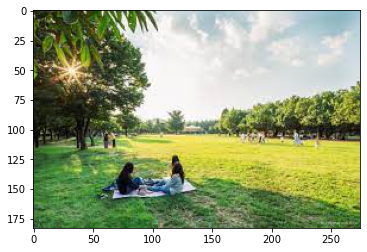

In [19]:
image = Image.open( img_file )
plt.imshow(image)
plt.show()

In [31]:
draw = ImageDraw.Draw(image)

# for i in range(len(obj_list)):
#    obj = obj_list[i]  와
# for obj in obj_list: 는 같은 결과

for obj in obj_list: 
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text( (x,y), name, font= ImageFont.truetype('malgun.ttf',20), fill = (255,0,0) )
    draw.rectangle(((x,y),(x+w, y+h)), outline =(255,0,0),width =2)

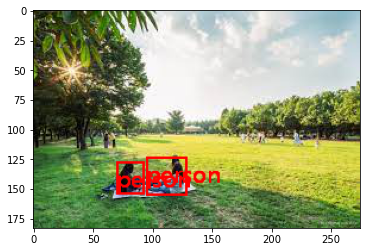

In [32]:
plt.imshow(image)
plt.show()